<hr style = "height : 5px;
             width : 100%;
             text-align : left;
             margin-left : 0;">

<h1  style="color:blue;
            font-size:300%;">  BINARY CLASSIFICATION, STROKE DATASET.   </h1>


<hr style = "height : 5px;
             width : 100%;
             text-align : left;
             margin-left : 0;">


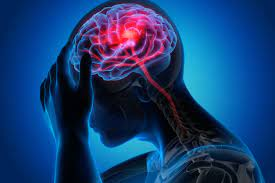

<hr style = "height : 5px;
             width : 100%;
             text-align : left;
             margin-left : 0;">

<h1 style="font-size:250%;"> Context : </h1>


<h3> According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. </h3>

<hr style = "height : 5px;
             width : 100%;
             text-align : left;
             margin-left : 0;">

<h1 style="font-size:250%;"> Atribute information : </h1>



<h3>
    
   **1) id: unique identifier**

   **2) gender: "Male", "Female" or "Other"**

   **3) age: age of the patient**

   **4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension**

   **5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease**

   **6) ever_married: "No" or "Yes"**

   **7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"**

   **8) Residence_type: "Rural" or "Urban"**

   **9) avg_glucose_level: average glucose level in blood**

   **10) bmi: body mass index**

   **11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"**

   **target --> stroke: 1 if the patient had a stroke or 0 if not** </h3>


<h3 style = "color: red;"> 
    Note: "Unknown" in smoking_status means that the information is unavailable for this patient </h3>


<hr style = "height : 5px;
             width : 100%;
             text-align : left;
             margin-left : 0;">
             

<h1 style="font-size:250%;"> Content : </h1>


<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">
             
    
## 1) The dataset :

- ### Loading data.
    
- ### Data information and shape.

<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">

## 2) Preprocessing :


- ### Find nulls and impute.
    
- ### Encoding categorical features.

- ### Balance dataset (KmeansSMOTE).

<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">


## 3) Exploratory data analysis (EDA) :


- ### Statistics of the data (summary).
   
- ### Data visualization.

- ### Contingency tables.

<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">
             
## 4) Feature engineering :


- ### Creating features.
   
- ### Dimensionality reduction (PCA).

- ### Feature importances (R.F & M.I).

<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">
             
## 5) Modeling :


- ### Split and standardize.
   
- ### Individual estimators.

- ### Nested cross validation.

- ### Majority vote.

- ### Bagging.

- ### Boosting.

- ### Deep learning (Neural network).


<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">
             
             
## 6) Model evaluation :


- ### Classification metrics.
   
- ### Confusion matrix.

- ### ROC-AUC.

<hr style = "height : 2px;
             width : 100%;
             text-align : left;
             margin-left : 0;">

# 1) The dataset.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd 
import time
import tensorflow as tf
from numpy import percentile
from pandas import get_dummies
from imblearn.over_sampling import KMeansSMOTE 
from collections import Counter
from pandas import crosstab
from sklearn.preprocessing import LabelEncoder , KBinsDiscretizer , StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel ,mutual_info_classif
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve,GridSearchCV ,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier ,VotingClassifier ,BaggingClassifier
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
if tf.config.list_physical_devices('GPU'):
    
    print('GPU:',tf.test.gpu_device_name())
    
else:
    
    print('CPU only')

## Loading data :

In [ ]:
path = '../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv'

dataset = pd.read_csv(filepath_or_buffer = path)

dataset

## Data information and shape :

In [ ]:
dataset.info()

In [ ]:
print('CLASS DISTRIBUTION : ',Counter(dataset.stroke))

In [ ]:
print(f"""DATA SHAPE:
--------------------
rows --> {dataset.shape[0]}
--------------------
columns --> {dataset.shape[1]}
--------------------
""")

# 2) Preprocessing.

## Find nulls and impute :

In [ ]:
nulls = dataset.isnull().sum()

nulls = pd.DataFrame(data = nulls ,columns = ['missing values'])

nulls

In [ ]:
print(f'bmi missing values: {round(( 201 / dataset.shape[0])*100,3)}% of instances')

In [ ]:
dataset = dataset.drop(columns = 'id') 

imputer = KNNImputer(missing_values = np.nan,
                     n_neighbors = 6,
                     copy = True)



imputed_bmi = imputer.fit_transform(X = dataset[['bmi']]) 

dataset['bmi'] = imputed_bmi

n_nulls = (dataset.bmi == np.nan).sum()

n_nulls

## Encoding categorical features :

In [ ]:
def data_encoder(data):
    
    new_data = data.copy()

    lb_encoder = LabelEncoder()
    
    cols = data.columns
    
    drop_first = False
    
    for col in cols:
        
        if str(new_data[col].dtype)  == 'object' and len(new_data[col].unique()) <= 3:
            
            if len(new_data[col].unique()) == 3:
                
                drop_first = True
            else:
                drop_first = False
        
            dummies = get_dummies(data = new_data[col],drop_first = drop_first)
            
            new_data = new_data.join(dummies)
            
            new_data = new_data.drop(columns = col)
            
        elif str(new_data[col].dtype)  == 'object' and len(new_data[col].unique()) > 3:
            
            new_data[col] = lb_encoder.fit_transform(new_data[col])
        else:
            continue
             
    return new_data


encoded_data = data_encoder(dataset)

encoded_data.head()

## Balance dataset :

In [ ]:
X_imb = encoded_data.drop(columns = 'stroke')

y_imb = encoded_data['stroke']


ksmote = KMeansSMOTE(random_state = 101,
                     k_neighbors = 7,
                     n_jobs = -1,
                     cluster_balance_threshold = 0)

KMeansSMOTE()

X_resampled, y_resampled = ksmote.fit_resample(X_imb, y_imb)

print('OVERSAMPLED DATASET SHAPE : ', Counter(y_resampled))

In [ ]:
balanced_data = pd.DataFrame(data = X_resampled,columns = X_imb.columns)

balanced_data = pd.concat([balanced_data , y_resampled],axis = 1)

balanced_data.drop_duplicates()

balanced_data.tail()

In [ ]:
sns.set_theme(style="darkgrid")

fig ,ax  = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,8))

sns.countplot(x = 'stroke' ,data = encoded_data ,ax = ax[0])

sns.countplot(x = 'stroke' ,data = balanced_data ,ax = ax[1])

ax[0].set_title('IMBALANCE',fontsize = 16)

ax[1].set_title('FULL SINTETIC OVERSAMPLING',fontsize = 16)

plt.show()

# 3) Exploratory data analysis (EDA).

## Statistics of the data (summary) :

In [ ]:
dataset.describe()

In [ ]:
def get_iqr(data):
    
    iqrs = []
    
    for col in data.columns:
        
        iqr = percentile(a = data[col] , q = 75.0) - percentile(a = data[col], q = 25.0)
        
        iqrs.append(round(iqr,4))
        
    return iqrs


print(f"IQRs: {get_iqr( dataset[['bmi','age','avg_glucose_level']] )}")

## Data visualization:

In [ ]:
fig , ax = plt.subplots(nrows = 5 ,ncols = 2 ,figsize = (15,30))

k = 0

for i in range(5):
    
    for j in range(2):

        sns.histplot(data = dataset[dataset.drop(columns = 'stroke').columns[k]],
                        ax = ax[ i , j ],
                        color = 'blue')

        k += 1
        
plt.show()

In [ ]:
plt.figure(figsize = (20,10))

sns.kdeplot(data = dataset[['avg_glucose_level','bmi','age']],shade = True,alpha = 0.7)

plt.show()

In [ ]:
plt.figure(figsize = (20,10))

sns.kdeplot(y = dataset.age,
            x = dataset.bmi,
            hue = dataset.stroke,
            shade = True,
            alpha = 0.7)
plt.show()

In [ ]:
sns.pairplot(data = dataset[['age','bmi','avg_glucose_level','stroke']],
             height = 4.5,
             aspect = 1,
             corner = True,
             kind = 'scatter')

plt.show()

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(data = dataset.corr(),
            annot = True,
            cmap = 'coolwarm',
            robust = True,
            linewidths = 3,
            linecolor = 'black')
plt.title('Feature correlation matrix \n',fontsize = 24)
plt.show()

In [ ]:
fig  , ax = plt.subplots(nrows = 3 ,ncols = 2, figsize = (20,25))

features = ['gender','smoking_status','hypertension',
            'work_type','heart_disease','ever_married']

f = 0

for i in range(3):
    
    for j in range(2):
        
        
        if f == len(features):
            
            continue
            
        else:
            
            sns.countplot(x = 'stroke',hue = features[f] ,data = dataset, ax = ax[i,j])
            
            f += 1
         
        
plt.show()

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'stroke',hue = 'Residence_type',data = dataset)
plt.show()

In [ ]:
plt.figure(figsize = (15,10))

sns.boxplot(data = dataset[['age','avg_glucose_level','bmi']] ,orient="h" ) 

plt.show()

## Contingency tables :

In [ ]:


colors = ['Accent','copper','coolwarm','Set1_r']

tabs = [pd.crosstab(dataset['age'] > 60, dataset['stroke'] == 1),
        
        pd.crosstab(dataset['gender'], dataset['stroke']),
        
        pd.crosstab(dataset['hypertension']  ==  1 , dataset['stroke'] == 1),
        
        pd.crosstab(dataset['Residence_type']  , dataset['smoking_status'])]


fig , ax = plt.subplots(nrows = 2 , ncols = 2 , figsize = (20,15))

c = 0

for i in range(2):
    
    for j in range(2):
        
        sns.heatmap(data = tabs[c] ,
                    cmap = colors[c],
                    linewidths = 2,
                    fmt='.2f',
                    annot = True , ax = ax[i,j])
        
        c += 1


        ax[i,j].set_title(f'Tab({c})',fontsize = 20)
        
        
plt.show()

# 4) Feature engineering.

## Creating features :

In [ ]:
kms = KMeans(n_clusters = 2)

kms.fit(balanced_data.drop(columns = 'stroke'),balanced_data['stroke'])

balanced_data['cluster'] =  kms.predict(balanced_data.drop(columns = 'stroke'))

In [ ]:
balanced_data.head()

In [ ]:
def age_segmenter(col):
    
    new_col = col.copy()
    
    for k in range(len(col)):
        
        if col[k] > 0 and col[k] <= 10:

            new_col[k] = 1
            
        elif col[k] > 10 and col[k] < 21:
            
            new_col[k] = 2 
            
        elif new_col[k] >= 21 and col[k] < 30:
            
            new_col[k] = 3 
    
        elif col[k] >= 30 and col[k] < 50:
            
            new_col[k] = 4 
            
        elif col[k] >= 50 and col[k] < 65:
            
            new_col[k] = 5 
            
        elif col[k] >= 65 and col[k] < 100:
            
            new_col[k] = 6
            
        else:
            continue
            
    return new_col

seg_age = age_segmenter(balanced_data['age'])

aug_data = balanced_data.copy()

aug_data['age_rate'] = seg_age 

fig , ax = plt.subplots(nrows = 1 ,ncols = 2 , figsize = (15,7))

sns.histplot(data = aug_data['age'],color = 'blue',ax = ax[0])

sns.histplot(data = aug_data['age_rate'],color = 'red',ax = ax[1])

plt.show()

In [ ]:
aug_data.head(1)

In [ ]:

kbins = KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='kmeans')

glucose_rate = kbins.fit_transform(aug_data[['avg_glucose_level']])

aug_data['glucose_rate'] = glucose_rate

fig , ax = plt.subplots(nrows = 1 ,ncols = 2 , figsize = (15,7))

sns.histplot(data = aug_data['avg_glucose_level'],color = 'orange',ax = ax[0])

ax[0].set_title('Original glucose feature dist')

sns.histplot(data = glucose_rate,ax = ax[1])

ax[1].set_title('New glucose feature dist')


plt.show()

In [ ]:
aug_data.head(1)

In [ ]:
bmi_rate = kbins.fit_transform(aug_data[['bmi']])

aug_data['bmi_rate'] = bmi_rate

fig , ax = plt.subplots(nrows = 1 ,ncols = 2 , figsize = (15,7))

sns.histplot(data = aug_data['bmi'],color = 'green',ax = ax[0])

ax[0].set_title('Original BMI feature dist')

sns.histplot(data = bmi_rate,ax = ax[1])

ax[1].set_title('New BMI feature dist')

plt.show()

In [ ]:
aug_data.head(1)

## Dimensionality reduction (PCA):

In [ ]:
pca = PCA(n_components = None,
          copy = True,
          whiten = False,
          svd_solver = 'auto',
          random_state = 101)


transformed_data = pca.fit_transform(X = aug_data[['bmi','age','avg_glucose_level']])

feature_variance = pca.explained_variance_ratio_

print(feature_variance)

In [ ]:
cum_var_exp = np.cumsum(feature_variance)


plt.figure(figsize=(20,7))

plt.bar(x = range(0,3),height = feature_variance , alpha = 0.5 ,
                                           align = 'center',
                                           label = 'Individual explained variance',
                                           color = 'orange')

plt.step(x = range(0,3),y = cum_var_exp , where = 'mid',
                                           label = 'Acumulative explained variance',
                                           marker = 'o')

plt.legend(loc='best')
plt.title('Principal components variance',fontsize=18)
plt.xlabel('Individual explained variance',fontsize=14)
plt.ylabel('Principal component index',fontsize=14)
plt.show()

In [ ]:

pca = PCA(n_components = 2,
          copy = True,
          whiten = False,
          svd_solver = 'auto',
          random_state = 101)


data_comp = pca.fit_transform(X = aug_data.drop(columns = 'stroke'))

fig = px.scatter_3d(x = data_comp[:,0],
                    y = data_comp[:,1],
                    z = aug_data.stroke,
                    opacity = 0.7,
                    color = aug_data.stroke,
                    width = 1000,
                    height = 800)

px.scatter_3d()
fig.show()

## Feature importances (R.F & M.I):

In [ ]:

X_ = aug_data.drop(columns = 'stroke')

y_ = aug_data['stroke']

rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',random_state = 101)

rf.fit(X = X_ , y = y_)

importances = rf.feature_importances_

indexs = np.argsort(a = importances)[::-1]

columns = X_.columns

print('Feature importances: \n')

for feature in range(X_.shape[1]):
    
    print(f'{feature + 1 }) {columns[feature].upper()}   [{round(importances[indexs[feature]],4)}] \n')


In [ ]:
plt.figure(figsize = (20,10))

plt.title('Feature importances using RF',fontsize = 18)

plt.barh(width = importances[indexs][::-1],
         y = X_.columns[::-1],
         color = 'orange')

plt.show()

In [ ]:
sfm = SelectFromModel(estimator = rf , threshold = 0.07 )

selected = sfm.fit_transform(X = X_ ,  y = y_)

for k in range(selected.shape[1]):
    
    print(columns[indexs[k]] , importances[indexs[k]])

In [ ]:
mti = mutual_info_classif(X = X_,
                          y = y_,
                          n_neighbors = 5,
                          copy = True,
                          random_state = 101)

ind = np.argsort(a = mti)[::-1]

for k in range(X_.shape[1]):
    
    print(columns[ind[k]] , mti[ind[k]])

# 5) Modeling.

## Split and standardize:

In [ ]:

X = aug_data.drop(columns = 'stroke').values

y = aug_data['stroke'].values

X_train , X_test ,y_train , y_test = train_test_split(X , y , random_state = 101,
                                                                       test_size = 0.2,
                                                                       stratify = y)
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.fit_transform(X_test)

print(f"""| Train shape | Test shape | 
----------------------------
| {X_train.shape}   | {X_test.shape}  |""")

## Prove individual estimators:

In [ ]:

train_perf = []

test_perf = []


models = [SVC(C = 1000 ,
              kernel = 'rbf',
              gamma = 0.01,
              random_state = 101),
          
          LogisticRegression(penalty = 'l2',
                            C = 10,
                            random_state = 101),
          
          KNeighborsClassifier(n_neighbors = 7,
                               p = 2),
          
          DecisionTreeClassifier(max_depth = 10,
                                 random_state = 101,
                                 criterion = 'entropy'),
          
          RandomForestClassifier(n_estimators = 200 ,
                                 random_state = 101)]



for model in models:

    model.fit(X_train_std, y_train)
    
    train_score = model.score(X_train_std,y_train)
    
    test_score = model.score(X_test_std, y_test)

    train_perf.append(train_score)

    test_perf.append(test_score)


est_summary = pd.DataFrame(data = [train_perf ,test_perf] , columns = ['SVM','LOGR','KNN','DECT','RANDF'],
                          index = ['TRAIN SCORE:','TEST SCORE:']) 
est_summary

In [ ]:

def plot_learning_curve(estimator, X ,y):

    est_pipe = Pipeline(steps = [('scaler', StandardScaler()),
                                ('estimator', estimator)])

    train_sizes  , train_scores , test_scores = learning_curve(estimator = est_pipe,
                                                              X = X,
                                                              y = y,
                                                              train_sizes = np.array([0.1, 0.3, 0.5 , 0.7, 1.0]),
                                                              cv = 10,
                                                              n_jobs = -1,
                                                              scoring = 'accuracy',
                                                              random_state = 101) 


    train_mean = np.mean(train_scores,axis = 1)

    train_std = np.std(train_scores ,axis = 1)

    test_mean = np.mean(test_scores,axis = 1)

    test_std = np.std(test_scores,axis = 1)

    plt.figure(figsize = (10,7))

    plt.plot(train_sizes , train_mean ,color = 'blue' , marker = 'o',markersize = 5,label = 'Train accuracy')

    plt.fill_between(x = train_sizes ,
                     y1 = (train_mean + train_std),
                     y2 = (train_mean - train_std),
                     alpha = 0.15,
                     color = 'blue')

    plt.plot(train_sizes , test_mean , color = 'red' , marker = 'o',label = 'Validation accuracy')

    plt.fill_between(x = train_sizes ,
                     y1 = (test_mean + test_std),
                     y2 = (test_mean - test_std),
                     alpha = 0.15,
                     color = 'red')

    plt.title(f'{estimator.__class__.__name__} learning curve',fontsize = 18)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()

In [ ]:
plot_learning_curve(models[0], X_train ,y_train)

In [ ]:
plot_learning_curve(models[3],X_train ,y_train)

## Nested cross validation :

In [ ]:

def nested_cross_val(estimator , params , X_train ,y_train):
    
    grid = GridSearchCV(estimator = estimator,
                           param_grid = params,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           refit = True,
                           cv = 2)

    start_time = time.time()
    
    scores = cross_val_score(estimator = grid,
                             X = X_train,
                             y = y_train,
                             scoring = 'accuracy',
                             cv = 5)
    
    print(f"""
    
    ESTIMATOR: {estimator.__class__.__name__}
    
    CV ACCURACY: {np.mean(scores)*100} %  +/-  {np.std(scores)}
    
    TIME: {round((time.time() - start_time),2)} secs
    """)
    
    return np.mean(scores)


In [ ]:
svm_params = {'kernel': ['rbf'],
             'C':[0.1, 1.0 , 10.0, 100.0],
              'gamma': [0.001,0.01,0.1]}

svm_score = nested_cross_val(estimator = SVC(),
                           params = svm_params,
                           X_train = X_train_std,
                           y_train = y_train)

In [ ]:
lr_params = {'penalty': ['l2'],
             'C':[0.01,0.1,1.0,10.0, 100.0]}

lr_score = nested_cross_val(estimator = LogisticRegression(),
                          params = lr_params,
                          X_train = X_train_std,
                          y_train = y_train)

In [ ]:
knn_params = {'n_neighbors':[7,8,10],
             'p':[2,3]}

knn_score = nested_cross_val(estimator = KNeighborsClassifier(),
                           params = knn_params,
                           X_train = X_train_std,
                           y_train = y_train)

In [ ]:
dt_params = {'criterion':['gini','entropy'],
            'max_depth':[3,5,7,10,30],
            'min_samples_split':[2,4]}


dt_score = nested_cross_val(estimator = DecisionTreeClassifier(),
                          params = dt_params,
                          X_train = X_train_std,
                          y_train = y_train)

In [ ]:
rf_params = {'n_estimators':[100,200,500]}

rf_score = nested_cross_val(estimator = RandomForestClassifier(),
                          params = rf_params,
                          X_train = X_train_std,
                          y_train = y_train)


## Majority vote : 

In [ ]:
estimators = [('SVM',SVC(C = 1000 ,
                         kernel = 'rbf',
                         gamma = 0.01,
                         random_state = 101,
                         probability = True)), 
              
              ('LR',LogisticRegression(penalty = 'l2',
                                       C = 10,
                                       random_state = 101)),
                                        
              ('KNN',KNeighborsClassifier(n_neighbors = 5,
                                          p = 2)),
                                        
              ('DT',DecisionTreeClassifier(max_depth = 7,
                                           random_state = 101,
                                           criterion = 'entropy')),

              ('RF',RandomForestClassifier(n_estimators = 200 ,
                                           random_state = 101))]


mv_clf = VotingClassifier(estimators = estimators,
                          voting = 'hard',
                          n_jobs = -1,
                          flatten_transform = True)


mv_clf.fit(X_train_std ,y_train)


print(f"""
    
    MAJORITY VOTE
    
    TRAIN ACCURACY: {mv_clf.score(X_train_std,y_train)}
    
    TEST ACCURACY:  {mv_clf.score(X_test_std,y_test)}
    
    """)

## Bagging :

In [ ]:
base_estimator = SVC(C = 1000 ,
                         kernel = 'rbf',
                         gamma = 0.01,
                         random_state = 101,
                         probability = True)

bag_clf = BaggingClassifier(base_estimator = base_estimator,
                            n_estimators = 50,
                            max_samples = 1.0,
                            max_features = 1.0,
                            bootstrap = True,
                            bootstrap_features = False,
                            warm_start = True,
                            n_jobs = -1,
                            random_state = 101)



bag_clf.fit(X_train_std ,y_train)


print(f"""
    
    BAGGING
    
    TRAIN ACCURACY: {bag_clf.score(X_train_std,y_train)}
    
    TEST ACCURACY:  {bag_clf.score(X_test_std,y_test)}
    
    """)

## Boosting :

In [ ]:
tree = DecisionTreeClassifier(criterion = 'entropy',
                             random_state = 101,
                             max_depth = 10)

ada_clf = AdaBoostClassifier(base_estimator = tree,
                         n_estimators = 500,
                         learning_rate = 0.003,
                         algorithm = 'SAMME.R',
                         random_state = 101)

ada_clf.fit(X_train_std ,y_train)


print(f"""
    
    BOOSTING
    
    TRAIN ACCURACY: {ada_clf.score(X_train_std,y_train)}
    
    TEST ACCURACY:  {ada_clf.score(X_test_std,y_test)}
    
    """)

## Deep learning (Neural network) :

In [ ]:
neural_net = keras.models.Sequential()

neural_net.add(keras.layers.Dense(units = 34 ,activation = 'relu', input_dim = (X.shape[1])))

neural_net.add(keras.layers.Dense(units = 68 ,activation = 'relu'))

neural_net.add(keras.layers.Dropout(rate = 0.2))

neural_net.add(keras.layers.Dense(units = 1 ,
                                  activation = 'sigmoid',
                                  kernel_regularizer = keras.regularizers.l2(l2 = 0.001)))


neural_net.compile(optimizer='rmsprop',
                   loss = 'binary_crossentropy',
                   metrics = ['binary_accuracy','Recall'],
                   run_eagerly = True)


neural_net.summary()

In [ ]:
EPOCHS = 20

reduce_lr = ReduceLROnPlateau(monitor = 'val_binary_accuracy', 
                              factor = 0.2,
                              patience = 4,
                              min_lr = 0.001,
                              verbose = 1)


history = neural_net.fit(x = X_train_std,
                         y = y_train,
                         epochs = EPOCHS,
                         verbose = True,
                         validation_split = 0.2,
                         batch_size = 20,
                         callbacks = [reduce_lr])


In [ ]:
plt.figure(figsize = (15,8))

plt.title('TRAIN-TEST LOSSES',fontsize = 18)

plt.plot([i for i in range(EPOCHS)],
         history.history['loss'],
         linewidth = 5)

plt.plot([i for i in range(EPOCHS)],
         history.history['val_loss'],
         linewidth = 2,
         marker = 'o')

plt.xlabel('EPOCHS',fontsize = 14)

plt.ylabel('LOSS',fontsize = 14)

plt.show()

In [ ]:
plt.figure(figsize = (15,8))


plt.title('TRAIN-TEST ACCURACY',fontsize = 18)

plt.plot([i for i in range(EPOCHS)], 
         history.history['binary_accuracy'],
         linewidth = 5)

plt.plot([i for i in range(EPOCHS)],
         history.history['val_binary_accuracy'],
         linewidth = 2,
         marker = 'o')

plt.xlabel('EPOCHS',fontsize = 14)

plt.ylabel('ACCURACY',fontsize = 14)

plt.show()

# 6) Model evaluation.

## Classification metrics:

In [ ]:
def model_eval(model , X_test ,y_test ,model_name): 
    
    y_hat = model.predict(X_test)
    
    if len(np.unique(y_hat)) > 2:
        
        for k in range(len(y_hat)):
            
            if y_hat[k] >= 0.5 :
                
                y_hat[k] = 1
            else:
                y_hat[k] = 0        
        
    report = metrics.classification_report(y_test ,y_hat)
    
    print(f"""
    
    {model_name.upper()}
    
    {report}
    
    """)    

In [ ]:
model_eval(models[0],X_test_std ,y_test , 'Support vector machine')

In [ ]:
model_eval(neural_net,X_test_std ,y_test , 'Neural network')

In [ ]:
model_eval(ada_clf,X_test_std ,y_test,'adaboost')

## Confusion matrix:

In [ ]:
def plot_conf_matrix(model , X_test ,y_test , model_name , cmap ):
    
    y_hat = model.predict(X_test)
    
    if len(np.unique(y_hat)) > 2:
        
        for k in range(len(y_hat)):
            
            if y_hat[k] >= 0.5 :
                
                y_hat[k] = 1
            else:
                y_hat[k] = 0   

    conf_matrix = metrics.confusion_matrix(y_test , y_hat)

    plt.figure(figsize = (10,7))

    sns.heatmap(data = conf_matrix,
                    cmap = cmap,
                    center = True,
                    robust = True,
                    fmt = '0',
                    annot = True,
                    linewidths = 5,
                    linecolor = 'black',
                    square = True)
    
    plt.title(f'{model_name}',fontsize = 18)
    plt.show()

In [ ]:
plot_conf_matrix(models[0],X_test_std ,y_test ,'Support vector machine' , 'Accent')

In [ ]:
plot_conf_matrix(neural_net ,X_test_std ,y_test ,'neural network' , 'Set2')

In [ ]:
plot_conf_matrix(ada_clf ,X_test_std ,y_test , 'adaboost','copper')

## ROC-AUC:

In [ ]:
ada_pipe = Pipeline(steps = [('scaler' , scaler),
                             ('pca',pca),
                             ('adaboost',ada_clf)])


cv = list(StratifiedKFold(n_splits = 3 ,random_state = 101 ,shuffle = True).split(X_train , y_train))

mean_tpr = 0.0

mean_fpr = np.linspace(0,1,100)

all_tpr = []

plt.figure(figsize = (15,8))


for k ,(tr ,ts) in enumerate(cv):
    
    ada_pipe.fit(X = X_train[tr] ,y =  y_train[tr])
    
    y_pred = ada_pipe.predict_proba(X_train[ts])
    
    fpr , tpr ,thrs = metrics.roc_curve(y_train[ts],
                                        y_pred[:,1],
                                        pos_label = 1)
    
    mean_tpr += np.interp(mean_fpr ,fpr , tpr)
    
    mean_tpr[0] = 0.0
    
    roc_auc = metrics.auc(fpr,tpr)
    
    plt.plot(fpr ,tpr ,label = f'ROC fold {k + 1} , {round(roc_auc,2)}', linewidth = 3)
    
    
    
plt.plot([0,1],[0,1] , linestyle = '--', color = 'red',label = 'Random guessing')


mean_tpr /= len(cv)

mean_tpr[-1] = 1.0

mean_auc = metrics.auc(mean_fpr,mean_tpr)

plt.plot([0,0,1],[0,1,1],linestyle = ':', color = 'black',label = 'Perfect performance')
    
plt.title('ROC-AUC Adaboost classifier',fontsize = 18)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc = 'lower right')
plt.show()